#Import Libraries

In [247]:
import pandas as pd #provides ready to use high-performance data structures and data analysis tools
import numpy as np #used for working with arrays
import matplotlib.pyplot as plt # for plotting the data on a graph

# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree #for using decision tree
from sklearn.metrics import accuracy_score
#for displaying inline graph instead of a pop up graph
%matplotlib inline 
import graphviz #for displaying the dat as a decision tree

#Load the Data

In [248]:
df = pd.read_csv('/content/car.data')
df.columns=['buying', 'maintenance', 'doors','persons','lug_boot','safety','car_acceptability']
# displaying 5 random samples.
df.sample(5) 

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
81,vhigh,vhigh,5more,2,small,med,unacc
216,vhigh,med,2,2,small,med,unacc
1691,low,low,4,more,small,low,unacc
169,vhigh,high,4,2,big,high,unacc
850,high,low,5more,4,med,high,acc


#Shape of data

In [249]:
df.shape

(1727, 7)

#Print the top five samples of acceptable



In [250]:
type1= df.loc[df['car_acceptability'] =="acc"]
type1.head()

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
226,vhigh,med,2,4,small,high,acc
229,vhigh,med,2,4,med,high,acc
231,vhigh,med,2,4,big,med,acc
232,vhigh,med,2,4,big,high,acc
238,vhigh,med,2,more,med,high,acc


#Print the top five samples of good

In [251]:
type1= df.loc[df['car_acceptability'] =="good"]
type1.head()

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
1198,med,low,2,4,small,high,good
1201,med,low,2,4,med,high,good
1203,med,low,2,4,big,med,good
1210,med,low,2,more,med,high,good
1212,med,low,2,more,big,med,good


#Print the top five samples of unacceptable

In [252]:
type1= df.loc[df['car_acceptability'] =="unacc"]
type1.head()

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


#Print the top five samples of very good

In [253]:
type1= df.loc[df['car_acceptability'] =="vgood"]
type1.head()

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
1096,med,med,2,4,big,high,vgood
1105,med,med,2,more,big,high,vgood
1123,med,med,3,4,big,high,vgood
1129,med,med,3,more,med,high,vgood
1132,med,med,3,more,big,high,vgood


#View summary of dataset

In [254]:
#Print the overall summary of the dataset using pandas info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying             1727 non-null   object
 1   maintenance        1727 non-null   object
 2   doors              1727 non-null   object
 3   persons            1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   car_acceptability  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [255]:
##check the distribution of species in the data using panadas value_count method. 
df.value_counts()

buying  maintenance  doors  persons  lug_boot  safety  car_acceptability
high    high         2      2        big       high    unacc                1
med     med          4      more     small     med     acc                  1
                                               high    acc                  1
                                     med       med     acc                  1
                                               low     unacc                1
                                                                           ..
low     low          3      2        med       med     unacc                1
                                               low     unacc                1
                                               high    unacc                1
                                     big       med     unacc                1
vhigh   vhigh        5more  more     small     med     unacc                1
Length: 1727, dtype: int64

In [256]:
#Check whether the data contains any missing vakues or not, by using the panadas dataframe isnull method. 
df.isnull()

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


# Coverting string data to numerical data

In [257]:
label= LabelEncoder()
df=df.apply(label.fit_transform)
# displaying 5 random samples.
df.sample(5)

,buying,maintenance,doors,persons,lug_boot,safety,car_acceptability
592,0,0,1,2,0,0,0
1050,2,0,2,2,0,2,0
1676,1,1,2,0,1,1,2
1106,2,2,1,0,2,1,2
1035,2,0,2,1,2,2,2


#Build Machine Learning Model

In [258]:
#Lets create feature matrix X  and y labels
X = df[['buying', 'maintenance', 'doors','persons','lug_boot','safety']]
y = df[['car_acceptability']]

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (1727, 6)
y shape= (1727, 1)


#Splitting dataset into training data, validation data, and test data.

In [259]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

# Now since we want the valid and test size to be equal (20% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print('X_train dimension= ', X_train.shape), print('y_train dimension= ', y_train.shape)
print('X_valid dimension= ', X_valid.shape), print('y_valid dimension= ', y_valid.shape)
print('X_test dimension= ', X_test.shape), print('y_test dimension= ', y_test.shape)

X_train dimension=  (1036, 6)
y_train dimension=  (1036, 1)
X_valid dimension=  (345, 6)
y_valid dimension=  (345, 1)
X_test dimension=  (346, 6)
y_test dimension=  (346, 1)


(None, None)

In [260]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
You are reuesyed to use 'entropy' criteria in the lab
"""
cls = tree.DecisionTreeClassifier(criterion='entropy', random_state=12)
#Fit the model using the fit method.
cls.fit(X_train, y_train)   

DecisionTreeClassifier(criterion='entropy', random_state=12)

# Model Score
##Test set accuracy

In [261]:
#Check model accuracy using the score method.
#TO DO

y_predict_test= cls.predict(X_test)
accuracy= accuracy_score(y_test,y_predict_test)
print("Accuracy of test data: ",accuracy)

Accuracy of test data:  0.9826589595375722


Train set accuracy

In [262]:
y_predict_train= cls.predict(X_train)
accuracy= accuracy_score(y_train,y_predict_train)
print("Accuracy of train data: ",accuracy)

Accuracy of train data:  1.0


## Validation set accuracy

In [263]:
y_predict_valid= cls.predict(X_valid)
accuracy= accuracy_score(y_valid,y_predict_valid)
print("Accuracy of validation data: ",accuracy)

Accuracy of validation data:  0.9681159420289855


#Decision Tree Depth

In [264]:
print("The depth of the tree is :",cls.get_depth())

The depth of the tree is : 13


#Number of Nodes in the tree


In [265]:
nodes = cls.tree_.node_count
print("Total no. of nodes:", nodes)


Total no. of nodes: 149


#Visualizing the Decision Tree

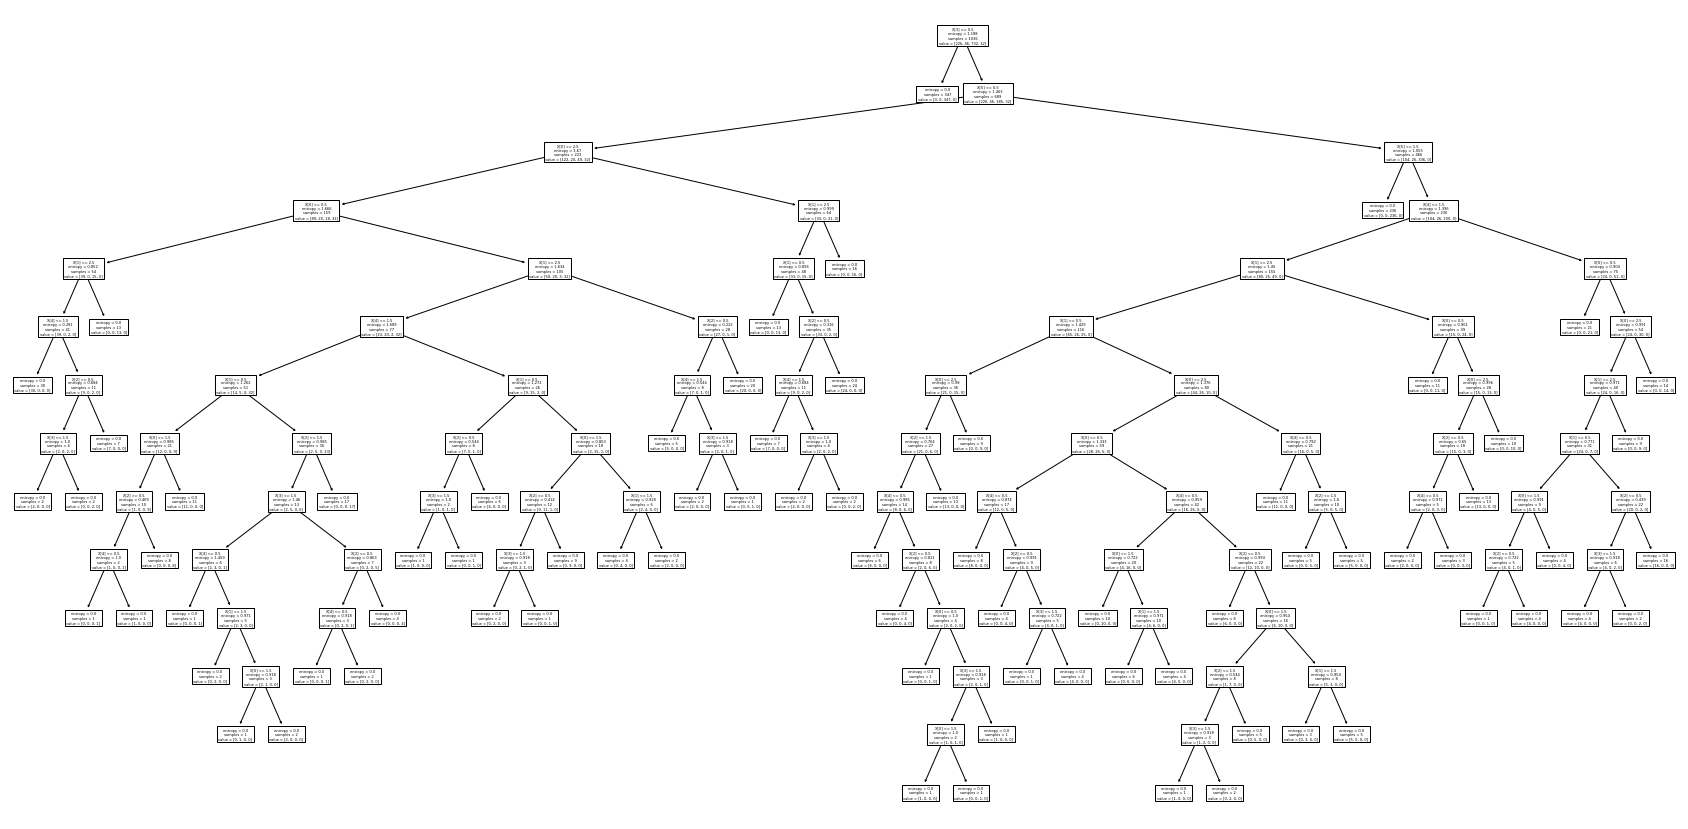

'Orignal_decision_tree.pdf'

In [266]:
plt.figure(figsize=(30,15))
tree.plot_tree(cls) 
plt.show()
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Orignal_decision_tree") 

#Pre-pruning the Decision Tree
##Hyperparameter: max_depth

In [267]:
cls = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=12)
cls.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=12)

##Train set accuracy

In [268]:
y_predict_train= cls.predict(X_train)
accuracy= accuracy_score(y_train,y_predict_train)
print("Accuracy of train data: ",accuracy)

Accuracy of train data:  0.9845559845559846


#Test set accuracy

In [269]:
y_predict_test= cls.predict(X_test)
accuracy= accuracy_score(y_test,y_predict_test)
print("Accuracy of test data: ",accuracy)

Accuracy of test data:  0.9682080924855492


#Validation set accuracy

In [270]:
y_predict_valid= cls.predict(X_valid)
accuracy= accuracy_score(y_valid,y_predict_valid)
print("Accuracy of valid data: ",accuracy)

Accuracy of valid data:  0.9681159420289855


#Decision tree depth

In [271]:
print("The depth of the tree is :",cls.get_depth())

The depth of the tree is : 10


#Number of Nodes in the tree

In [272]:
nodes = cls.tree_.node_count
print("Total no. of nodes:", nodes)

Total no. of nodes: 125


#Visualizing the decision tree

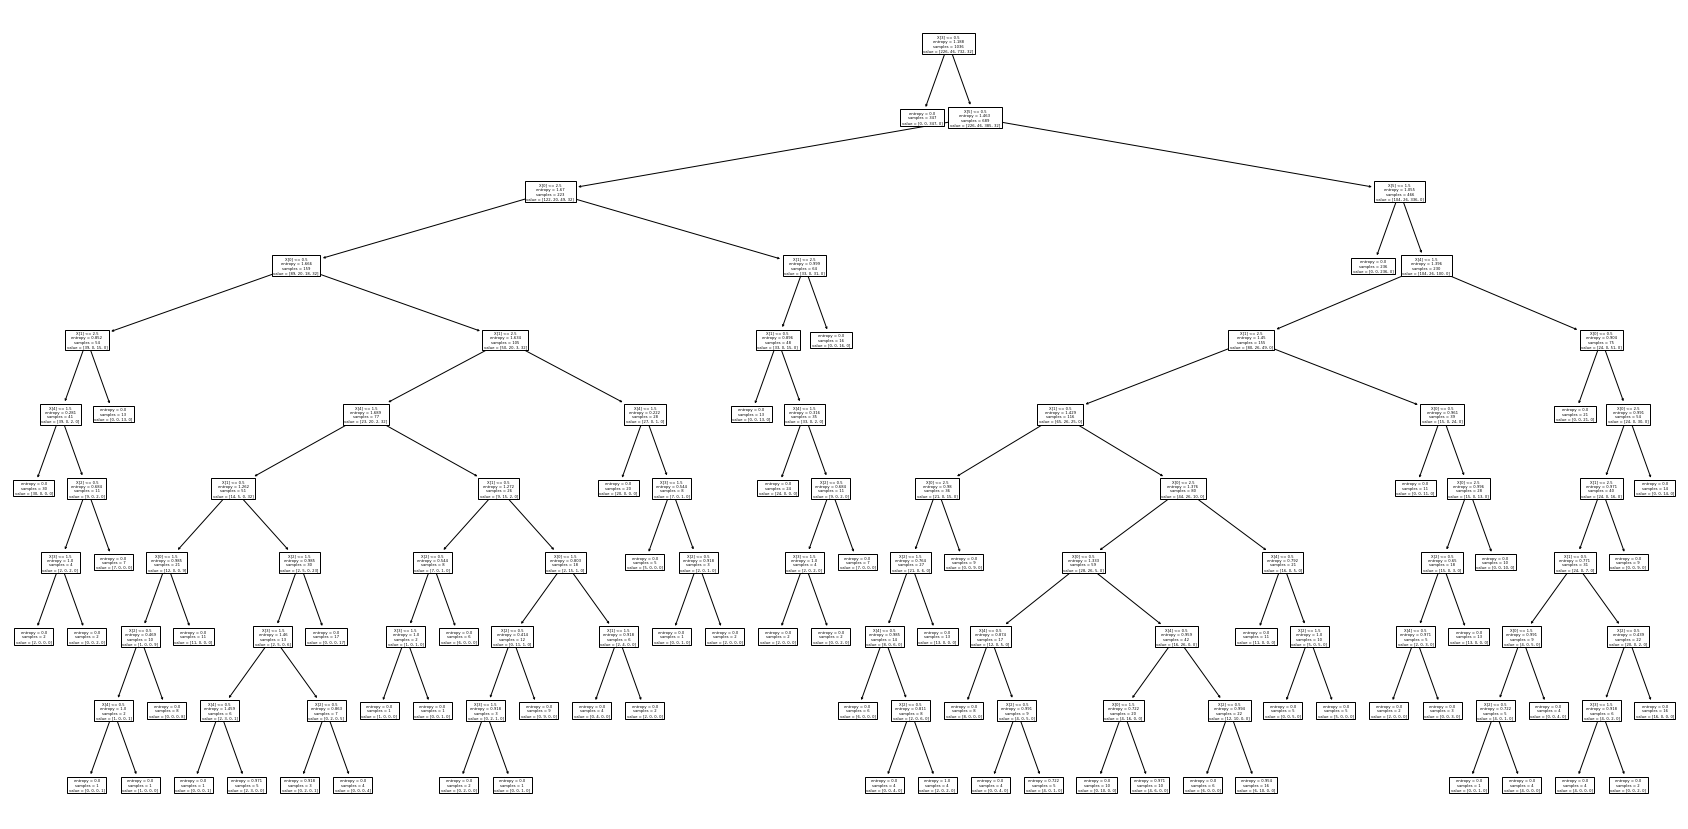

'Pre_pruned_decision_tree.pdf'

In [273]:
plt.figure(figsize=(30,15))
tree.plot_tree(cls) 
plt.show()
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Pre_pruned_decision_tree") 

#Post pruning the decision tree

In [274]:
cls = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

##Using test data to post prune the decision tree

In [275]:
path = cls.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clsp = []
for ccp_alpha in ccp_alphas:
    cls = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alpha, random_state=42)
    cls.fit(X_train, y_train)
    clsp.append(cls)
    
scores = [cross_val_score(cls, X_train, y_train, cv=5).mean() for cls in clsp]
best_alpha = ccp_alphas[np.argmax(scores)]
print("Best alpha:", best_alpha)

# a new decision tree using the best alpha value
post_pruned_cls = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=best_alpha, random_state=42)
post_pruned_cls.fit(X_train, y_train)

Best alpha: 0.0


DecisionTreeClassifier(criterion='entropy', random_state=42)

##Train set accuracy

In [276]:
y_predict_train= post_pruned_cls.predict(X_train)
accuracy= accuracy_score(y_train,y_predict_train)
print("Accuracy of train data: ",accuracy)

Accuracy of train data:  1.0


##Test set accuracy

In [277]:
y_predict_test= post_pruned_cls.predict(X_test)
accuracy= accuracy_score(y_test,y_predict_test)
print("Accuracy of test data: ",accuracy)

Accuracy of test data:  0.976878612716763


##Validation set accuracy

In [278]:
y_predict_valid= post_pruned_cls.predict(X_valid)
accuracy= accuracy_score(y_valid,y_predict_valid)
print("Accuracy of valid data: ",accuracy)

Accuracy of valid data:  0.9681159420289855


#Decision tree depth

In [279]:
print("The depth of the tree is :",post_pruned_cls.get_depth())

The depth of the tree is : 13


#Number of Nodes in the tree

In [280]:
nodes = post_pruned_cls.tree_.node_count
print("Total no. of nodes:", nodes)

Total no. of nodes: 149


#Visualizing the descision tree

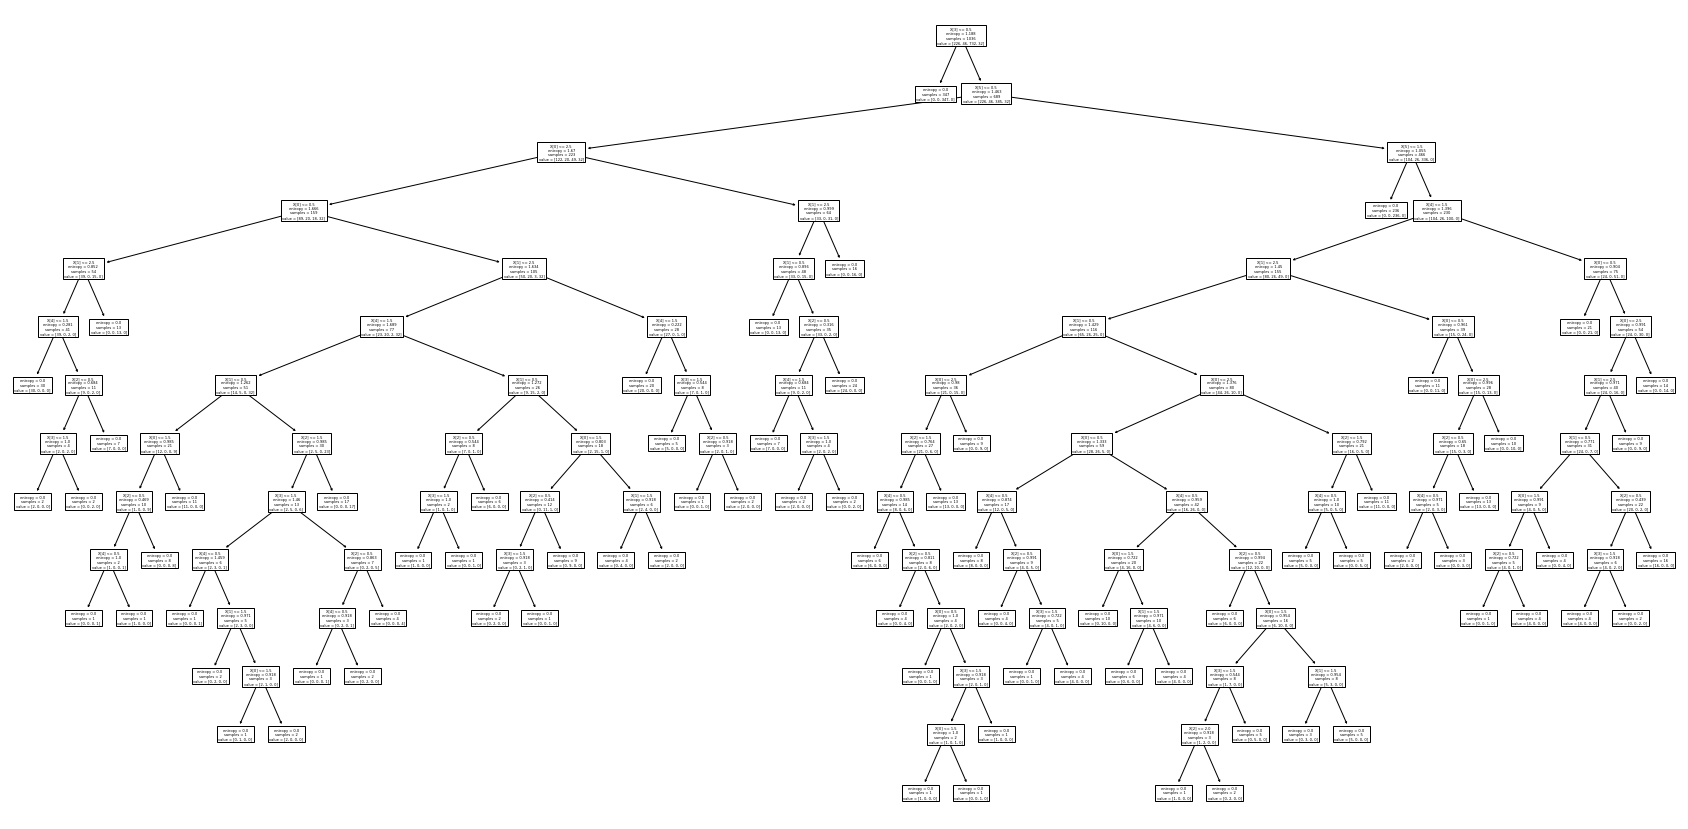

'Post_pruned_decision_tree.pdf'

In [281]:
plt.figure(figsize=(30,15))
tree.plot_tree(post_pruned_cls) 
plt.show()
dot_data = tree.export_graphviz(post_pruned_cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Post_pruned_decision_tree") 